In [8]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

In [112]:
def transform_many(pca, data):
    return np.array(list(pca.transform(x) for x in data.reshape(data.shape[0], 1, -1)))

def inverse_transform_many(pca, decomp_weights):
    return np.array(list(pca.inverse_transform(x) for x in decomp_weights)).reshape(decomp_weights.shape[0], -1)

In [34]:
def floor_insignificant(x, threshold=0.5):
    return 0 if abs(x) < threshold else x

vfloor_insig = np.vectorize(floor_insignificant)

In [2]:
data = fetch_olivetti_faces()

In [11]:
train_x, test_x = train_test_split(data["data"], train_size=0.8)
train_y, test_y = train_test_split(data["target"], train_size=0.8)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [27]:
img_shape = data["images"][0].shape

In [22]:
avg_face = train_x.mean(axis=0)
center_test_x = test_x - avg_face
center_train_x = train_x - avg_face

### Plot average, raw, and centered image

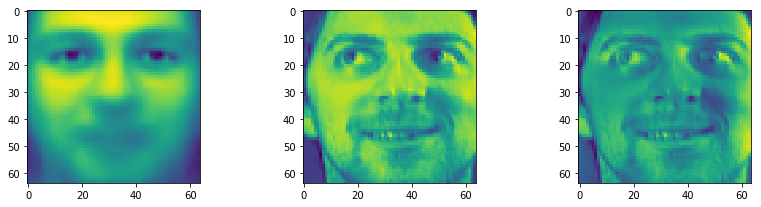

In [29]:
plt.figure(figsize=(14, 7))
plt.subplot(2, 3, 1)
plt.imshow(avg_face.reshape(img_shape))
plt.subplot(2, 3, 2)
plt.imshow(train_x[0].reshape(img_shape))
plt.subplot(2, 3, 3)
plt.imshow(center_train_x[0].reshape(img_shape))

In [30]:
pca1 = PCA(n_components=40)
pca1.fit(train_x)

PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

### Show eigenvalues (importance)

In [36]:
pca1.explained_variance_

array([19.29522   , 11.200539  ,  6.1760526 ,  3.9316373 ,  2.982956  ,
        2.551238  ,  1.8855436 ,  1.708874  ,  1.625185  ,  1.363174  ,
        1.3051914 ,  1.1306256 ,  1.0270458 ,  0.9489842 ,  0.88919663,
        0.82061106,  0.7547597 ,  0.642863  ,  0.59764135,  0.58076924,
        0.5527609 ,  0.5017917 ,  0.48908347,  0.47680962,  0.4614336 ,
        0.42688492,  0.41131768,  0.40980443,  0.36735258,  0.34996927,
        0.32713452,  0.29931965,  0.29654577,  0.28465474,  0.26367489,
        0.24752374,  0.2400126 ,  0.23637557,  0.23255497,  0.22975695],
      dtype=float32)

### Plot eigenvectors

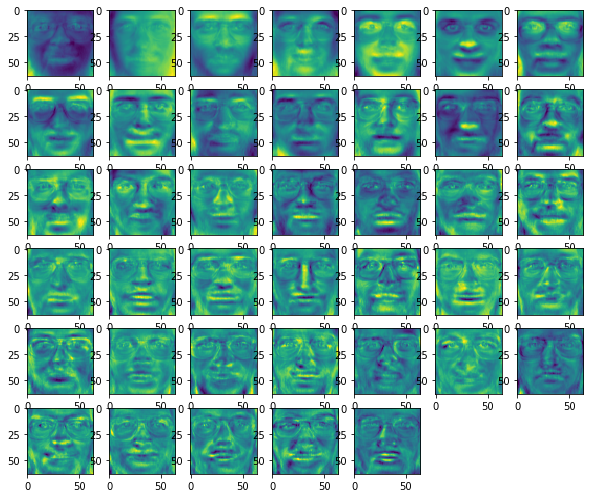

In [31]:
plt.figure(figsize=(10, 10))
width = np.ceil(np.sqrt(len(pca1.components_)))
for i, comp in enumerate(pca1.components_):
    plt.subplot(width, width, i+1)
    plt.imshow(comp.reshape(img_shape))

### Deconstruct, then reconstruct from eigenvectors

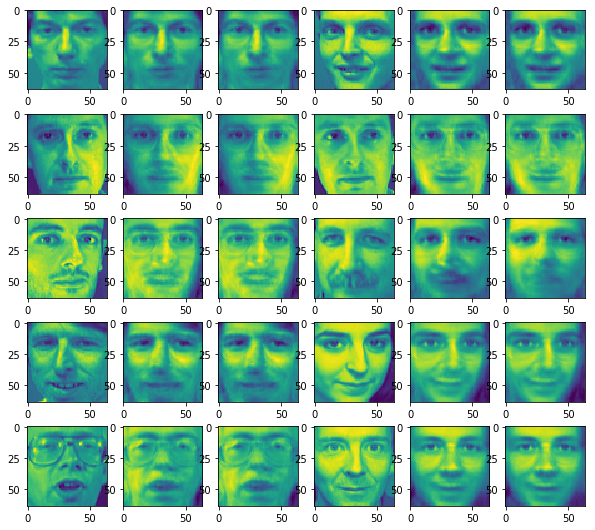

In [35]:
plt.figure(figsize=(10, 15))
for i, X in enumerate(test_x[:10]):
    Y = pca1.transform(X.reshape(1, -1))
    # Original
    plt.subplot(8, 6, 3*i+1)
    plt.imshow(X.reshape(img_shape))
    # PCA reconstruction
    plt.subplot(8, 6, 3*i+2)
    plt.imshow(pca1.inverse_transform(Y).reshape(img_shape))
    # PCA recon w/ flooring
    plt.subplot(8, 6, 3*i+3)
    plt.imshow(pca1.inverse_transform(vfloor_insig(Y, 0.25)).reshape(img_shape))

### Evaluate accuracy of pca model

In [80]:
def squared_error(a, b):
    return ((a - b) ** 2).sum(axis=1)

In [118]:
iters = 9
ncomp_err = np.zeros((iters, 2))
for i in range(iters):
    # Build & train pca
    pca = PCA(n_components=2**i)
    pca.fit(train_x)
    
    # Process data
    trans_x = transform_many(pca, train_x)
    recon_x = inverse_transform_many(pca, trans_x)
    error = squared_error(train_x, recon_x)
    
    # Record
    ncomp_err[i, 0] = 2**i
    ncomp_err[i, 1] = error.sum()

(320, 4096)
(320, 1, 1)
(320, 4096)
(320, 4096)
(320, 1, 2)
(320, 4096)
(320, 4096)
(320, 1, 4)
(320, 4096)
(320, 4096)
(320, 1, 8)
(320, 4096)
(320, 4096)
(320, 1, 16)
(320, 4096)
(320, 4096)
(320, 1, 32)
(320, 4096)
(320, 4096)
(320, 1, 64)
(320, 4096)
(320, 4096)
(320, 1, 128)
(320, 4096)
(320, 4096)
(320, 1, 256)
(320, 4096)


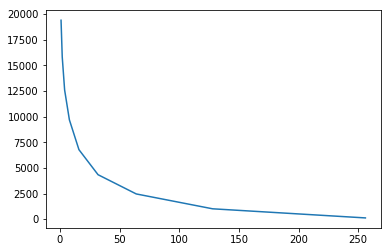

In [137]:
plt.plot(ncomp_err[:,0], ncomp_err[:,1])